# SYSC4906 Introduction to Machine Learning
## Assignment 1
|**Student name** | **Student number**|
|-----------------|-------------------|
| Riley MacKinnon | 100996542 |

# Question 1
Calculate the gradient of the following function: 
$$ f(x,z) \stackrel{\text{def}}{=} \sqrt{5x^3 + z^2 + 4xz + 11x + 5} $$


$$ \Delta f(x,z)= \begin{cases}{\delta{TBC} \over \delta{TBC}} \\{\delta{TBC} \over \delta{TBC}}\end{cases} $$

$${\delta{x} \over \delta{f(x)}}= {{1 \over {2 \sqrt{5x^3 + z^2 + 4xz + 11x + 5}}} \times {15x^2 + 4z + 11}}$$

$$$$

$${\delta{x} \over \delta{f(x)}}= {{1 \over {2 \sqrt{5x^3 + z^2 + 4xz + 11x + 5}}} \times {2z + 4x}}$$

$$$$

$${\delta{TBC} \over \delta{TBC}}= \frac{TBC}{TBC}$$

$$...$$

#Question 2

Create a python notebook which loads the sklearn breast cancer dataset (see sklearn.datasets.load_breast_cancer). This dataset has 2 classes of breast tumor biopsies: malignant (target=0) and benign (target=1). There are 569 samples (357 benign, 212 malignant) with 30 features each. 

    a) Split the data, using 75% for training and 25% for test. Make sure you use stratified sampling. 

    b) Train and test a logistic regression classifier. How accurate is your classifier?
    c) Repeat part b), but using only the first two features from the dataset. Was the classifier accuracy impacted?
    d) Using the (two feature) classifier from part c), create two subplots using the first two features from the data set. 
    
        i)  On the first, plot the decision boundary and the training data. Use green for malignant (target==0) and blue for benign (target==1).
    
        ii) On the second, plot the decision boundary and the test data. Use the same colours (blue/green), but highlight all misclassified test points (from either class) in red.



In [0]:
# Load libraries...
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

TOTAL_BENIGN = 357
TOTAL_MALIGNANT = 212


## Q2.a) Create the dataset

The first step is loading the breast cancer data. We will then split off the test data to be used for all training sets. Then create each training set, using **stratified sampling**

load_breast_cancer returns a Dictionary-like object, the interesting attributes are: 
* ‘data’, the data to learn, 
* ‘target’, the classification labels, 
* ‘target_names’, the meaning of the labels, 
* ‘feature_names’, the meaning of the features, and 
* ‘DESCR’, the full description of the dataset,

In [0]:
# Load the breast cancer dataset
bcData = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(bcData['data'], 
                                                    bcData['target'], 
                                                    test_size=.25, 
                                                    stratify= bcData['target'])



## Q2.b) Train and test a logistic regression classifier. How accurate is your classifier?

In [40]:
model = LogisticRegression(solver ='liblinear').fit(x_train, y_train)

score = model.score(x_test, y_test)

print("Score is " + str(score))

Score is 0.958041958041958


## Q2.c) Repeat part b), but using only the first two features from the dataset. Was the classifier accuracy impacted?

In [50]:
first_two_x_train = x_train[:, :2]
first_two_x_test = x_test[:, :2]

model_2 = LogisticRegression(solver ='liblinear').fit(first_two_x_train, y_train)

score_2 = model_2.score(first_two_x_test, y_test)

print("Score is only the first 2 feature vecotrs is: " + str(score_2))




Score is only the first 2 feature vecotrs is: 0.916083916083916


The classifier accuracy was impacted. Using only the first 2 vectors is less accurate.

## Q2.d) Using the (two feature) classifier from part c), create two subplots using the first two features from the data set. 

Text(0, 0.5, 'mean texture')

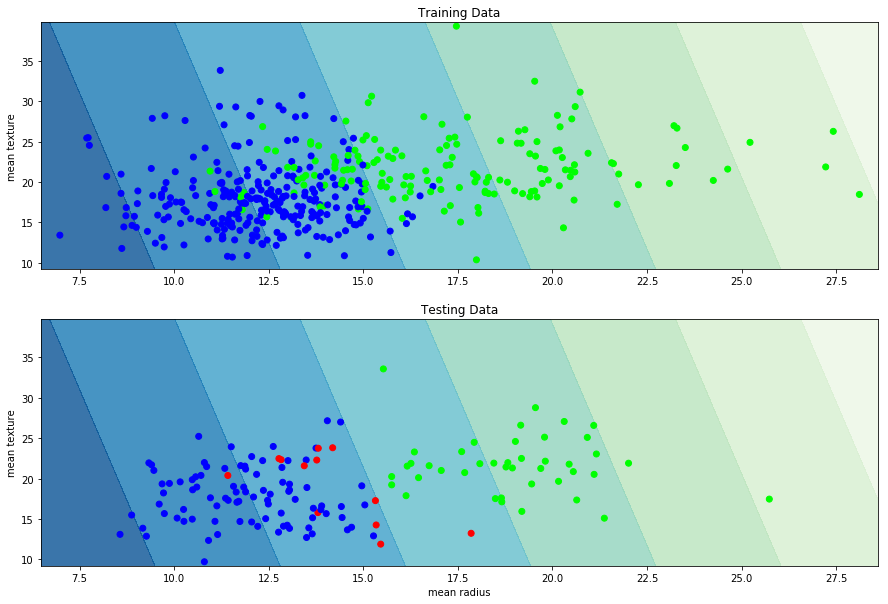

In [93]:
h = .02  # Resolution in colored mesh visualizations
figure = plt.figure(figsize=(15, 10))
cm = plt.cm.GnBu
cm_bright = ListedColormap(['#00FF00', '#0000FF'])
cm_bright_test = ListedColormap(['#00FF00', '#0000FF', '#FF0000'])

X = bcData['data'][:, :2]

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = model_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

plt.subplot(211)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(first_two_x_train[:, 0], first_two_x_train[:, 1], c=y_train, cmap=cm_bright)
plt.title('Training Data')
plt.ylabel(bcData['feature_names'][1])


predictions = model_2.predict(first_two_x_test);

for i in range(len(predictions)):
  if predictions[i] != y_test[i]:
      y_test[i] = 2

plt.subplot(212)    
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.scatter(first_two_x_test[:, 0], first_two_x_test[:, 1], c=y_test, cmap=cm_bright_test)
plt.title('Testing Data') 
plt.xlabel(bcData['feature_names'][0])
plt.ylabel(bcData['feature_names'][1])

 

# Question 3

Linear regression. Download the file “Assig1Q3.csv” from CULearn under “Assignments”. The first column represents the X values, while the second column represents the Y values.
* Plot the data

We are going to use linear regression to fit a linear and a quadratic model to these data. Without using sklearn.linear_model (or any other linear regression libraries), write your own python code to implement the least squares solution for linear regression. That is:
$$\beta=(X^TX)^{−1}X^Ty$$

* Assuming the model , use your code to best-fit the parameters m and b to the data. Report your optimal parameter values. 
*Hints: 
    * recall that you must create the ‘augmented’ feature vector X from the given x data (add a column of 1’s). 
    * look at numpy.T(), numpy.matmul(), numpy.dot(), and numpy.linalg.inv()
* Plot your line of best fit on top of the data
* Calculate the sum of square residuals, or mean squared error, as in:
$$MSE(\beta) = \sum_{i=1}^{N}{(y−X\beta)^2}$$
* Assuming the model , repeat steps 2-4 using this new model (i.e. estimate the optimal values for a,b,c; report those estimates; plot the line of best fit; report the MSE).
* Briefly discuss which model would you prefer for these data?
* Why is best-fitting the second (quadratic) model still considered linear regression?



## Step 1: Load the CSV file

In [138]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/mRileyMacK/SYSC4906/master/Assignments/Assignment1/Assig1Q3.csv', header = None)
print(str(len(data[1])))

100


## Step 2: Linear model y=mx+b

MSE = 540.3948277421325


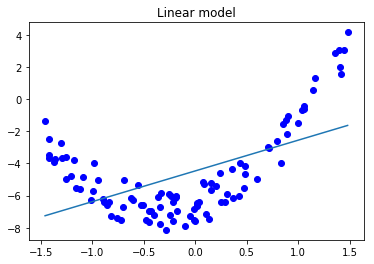

In [155]:
# Augment the x vector
X_vec = data[0]
Y_vec = data[1].to_numpy()
X_aug = np.column_stack((X_vec, np.ones(len(data[0]))))  #adding a column of ones to x

# Compute beta
beta = np.matmul((np.linalg.inv(np.matmul(X_aug.T, X_aug))), np.matmul(X_aug.T, Y_vec))
m = beta[0]
b = beta[1]
# Compute the MSE

MSE = np.sum(
          np.square(
              np.subtract(Y_vec, np.matmul(X_aug, beta))
          )
      )

print("MSE =", MSE)

#plot it bitch
X_sorted = data[0].sort_values()
plt.scatter(X_vec, Y_vec, c='#0000FF')
plt.title('Linear model')
plt.plot(X_sorted, (m * X_sorted + b))

## Step3: Quadratic model y=ax^2+bx+c

MSE = 56.83137448906699


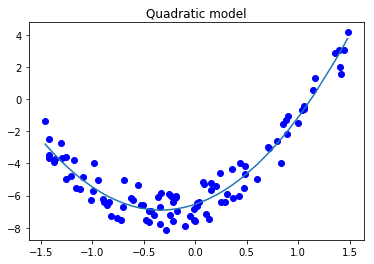

In [157]:
# Augment the x vector
X_aug = np.column_stack((np.square(X_vec), X_vec, np.ones(len(data[0]))))  #adding a column of ones to x
# Compute beta
beta = np.matmul((np.linalg.inv(np.matmul(X_aug.T, X_aug))), np.matmul(X_aug.T, Y_vec))
a = beta[0]
b = beta[1]
c = beta[2]
# Compute the MSE
MSE = np.sum(
          np.square(
              np.subtract(Y_vec, np.matmul(X_aug, beta))
          )
      )
print("MSE =", MSE) 

#plot it bitch
X_sorted = data[0].sort_values()
plt.scatter(X_vec, Y_vec, c='#0000FF')
plt.title('Quadratic model')
plt.plot(X_sorted, (a * (X_sorted**2) + b * X_sorted + c))

# Question 4

- Create a Jupyter Notebook based on Lecture5.ipynb to use make_classification to create a linearly separable dataset, with 2 classes, 2 informative features, 1000 samples per class, using a class_sep=2.0, and a random_state of 3. 
- Generate some random noise of the same shape as your feature data, drawn from a standard normal distribution (see numpy.random) and a random_state of 2. 
- Create four datasets: 
    1. no noise, 
    2. data + 0.5 * noise, 
    3. data + 1.0 * noise, 
    4. data + 2.0 * noise. 
- i) For all four datasets, plot the data, labelling each (sub)plot by the degree of noise added (i.e. 0, 0.5, 1.0, and 2.0)
- ii) For each dataset, create training and test data using a 70/30 train/test split (see train_test_split).
- iii) For each dataset, train and test an SVM classifier with a polynomial kernel with degree=2, and C=1.0. Report the test score for each. How does prediction accuracy change with noise level?
- iv) For a noise level of 0.5, train and test SVM classifiers using the following values for C: {0.001, 0.01, 0.1, 1, 10, 100}. 
   - Report the test accuracy for each. 
   - How does performance vary with C?
   - Briefly describe what the C controls for sklearn.svc. *Hint: look at the documentation for sklearn.svc rather than the class notes here...*


In [0]:
# Load the required libraries...
